# Count plots of Kebab restaurants

Code for calculating "density" and creating the barplots.

My definition of "density" is:

> Beeing a single restaurant place, how many other restaurants are within the radius of `radius` meters.

In [1]:
import pandas as pd
import os
import glob
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371000 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

My definition of "density" is:

> Beeing a single restaurant place, how many other restaurants are within the radius of `radius` meters.

In [6]:
def calculate_num_radius(lon, lat, radius, df):
    """Function to calculate number of nearby (radius) locations given a initial location and a dataframe to compare to.
    """
    
    n_in_radius = 0
    
    for i, row in df.iterrows():
        row_lat = row["geometry.location.lat"]
        row_lng = row["geometry.location.lng"]
        
        if haversine(lon, lat, row_lng, row_lat) <= radius:
            n_in_radius += 1
    return n_in_radius

def calculate_num_radius_apply(row, radius, df):
    return calculate_num_radius(row["geometry.location.lng"], row["geometry.location.lat"], radius, df)

# City comparison

In [7]:
cities = ['Heilbronn', 'Stuttgart', 'Marzahn', 'Berlin-Neukölln', 'Köln-Kalk', 'Hamburg-Altona', "Frankfurt-Hbf"]

In [8]:
radius_list = [100, 200, 300, 500, 1000, 2000]

In [9]:
radius_df = pd.DataFrame(index=cities, columns=radius_list)

In [10]:
for c in cities:
    print("Processing", c)
    df_c = pd.read_csv("data\\doener_%s.csv"%(c.lower()))
    
    for r in radius_list:
        df_c["n_%dm"%r] = df_c.apply(lambda x: calculate_num_radius_apply(x, radius=r, df=df_c), axis=1)
        
        radius_df.loc[c][r] = df_c["n_%dm"%r].max()

Processing Heilbronn
Processing Stuttgart
Processing Marzahn
Processing Berlin-Neukölln
Processing Köln-Kalk
Processing Hamburg-Altona
Processing Frankfurt-Hbf


In [11]:
radius_df

,100,200,300,500,1000,2000
Heilbronn,4,5,7,14,20,27
Stuttgart,4,5,7,9,17,32
Marzahn,2,2,3,4,9,12
Berlin-Neukölln,3,3,4,5,9,14
Köln-Kalk,4,4,4,7,10,16
Hamburg-Altona,5,8,9,10,17,33
Frankfurt-Hbf,3,4,4,6,13,26


In [12]:
def make_plot(radius):
    
    data = radius_df[radius].sort_values()

    color_palette = sns.color_palette("coolwarm", len(radius_df[radius]))
    fig = plt.figure(figsize=(15,7))
    data.plot.bar(color=color_palette)
    ax = fig.axes[0]
    ax.tick_params(axis="x", labelsize=20, labelrotation=45)
    #ax.set_ylabel("Maximale Anzahl Lokale im Umkreis von 500m")
    ax.tick_params(axis="y", labelsize=20)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(left=False, labelleft=False)

    vals = np.asarray(data.values)
    for i, v in enumerate(vals):
        ax.text(i-0.25, v+0.25, str(v), color='black', fontweight='bold', fontsize=17)

    fig.suptitle("Max. Anzahl von Kebab Restaurants im Umkreis von $%d$m."%radius, fontsize=22);

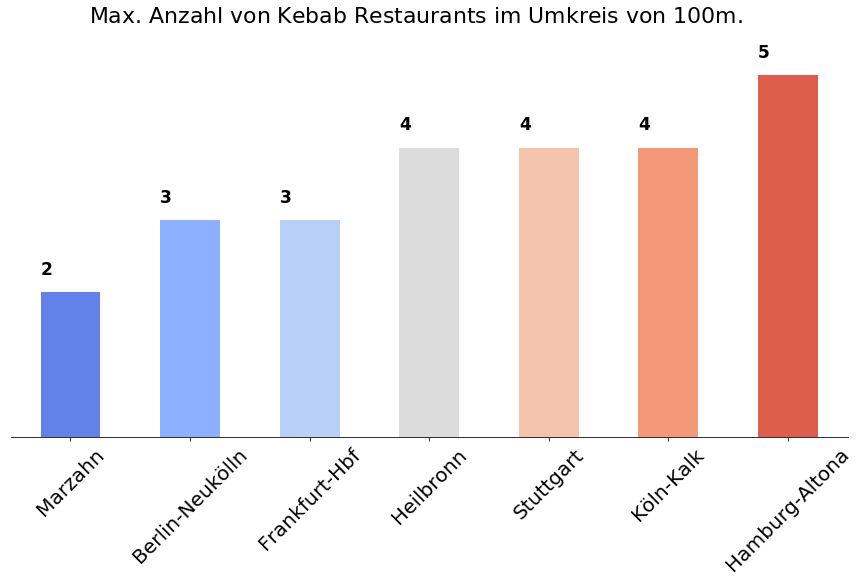

In [13]:
make_plot(100)

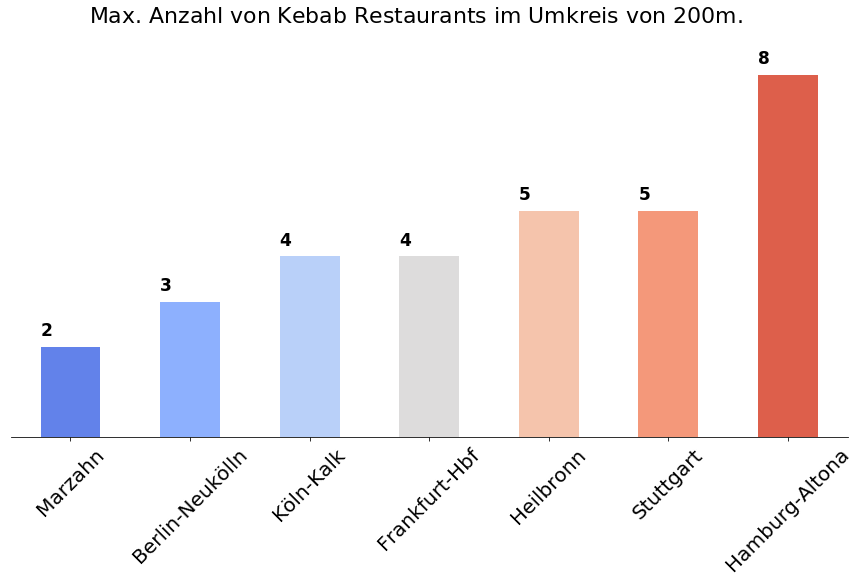

In [14]:
make_plot(200)

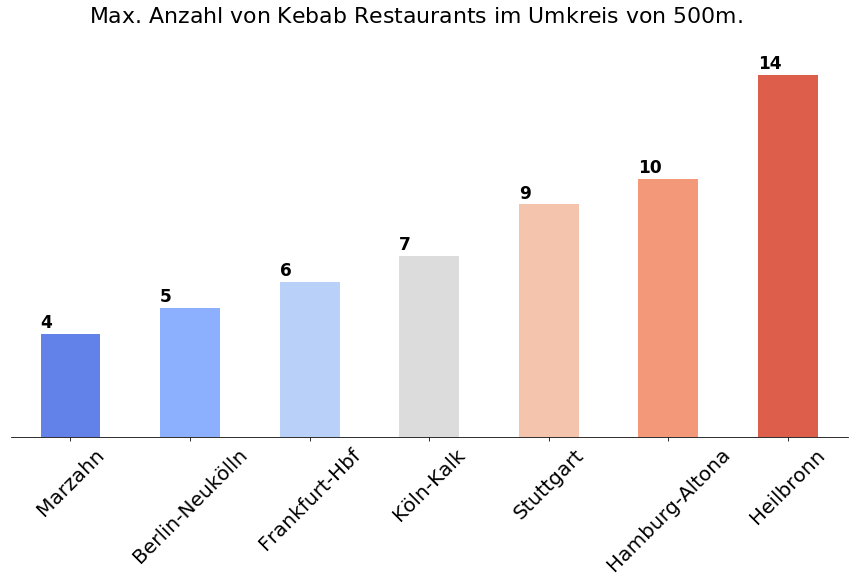

In [15]:
make_plot(500)

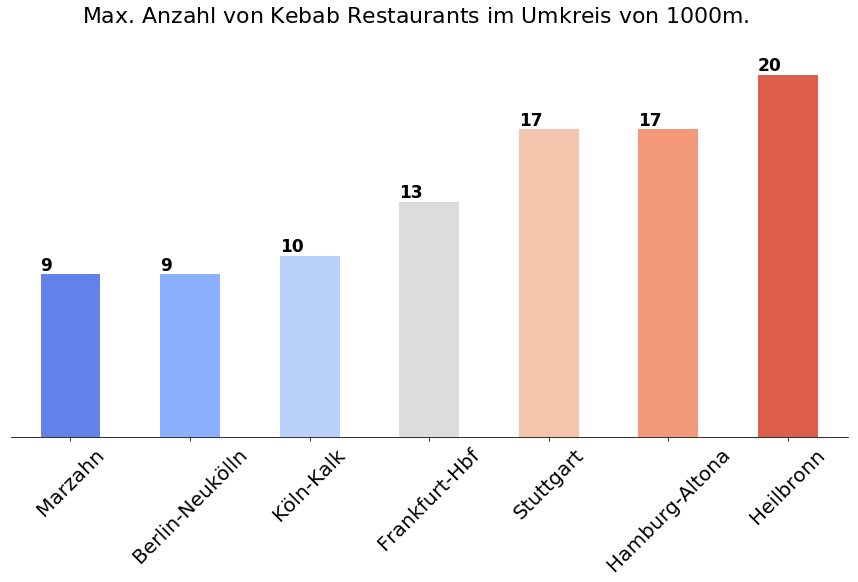

In [16]:
make_plot(1000)